Використай цей шаблон в роботі з датасетом.    
Ти можеш додавати комірки за потреби, але не змінюй структуру і послідовність питань.    
Обмежся функціями з наведених бібліотек.

In [589]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Переглянь список .json файлів, доступних за адресою https://github.com/prust/wikipedia-movie-data/tree/master.    
Відкрий будь-який файл, що містить у своїй назві рік і ознайомся з його структурою.    
Тепер сформуй список файлів, які ти будеш завантажувати.    
Для формування послідовності слід використати функцію numpy.arange.    
Довжина послідовності має становити не менше 5 датасетів(наприклад з 1960 по 2000  рік включно).    
Повну адресу сформуй через конкатенацію рядків.

In [590]:
# Зберігаємо в змінну адресу сайта
json_dir = "https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/"

In [591]:
# Формуємо список файлів для заватаження
nums = np.arange(1980, 2030, 10)
movie_file_list = [f'movies-{i}s.json' for i in nums]

# Перевіряємо результат
movie_file_list

['movies-1980s.json',
 'movies-1990s.json',
 'movies-2000s.json',
 'movies-2010s.json',
 'movies-2020s.json']

In [592]:
# Через конкатенацію створюємо список адрес датасетів
file_path = [json_dir + file for file in movie_file_list]

2. Тепер послідовність дій наступна.   
Слід пройти по всім обраним тобою файлам, прочитати кожен, як json об'єкт.        
Позбутись зайвих стовпців: ['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height'].     
Залишити лише повні рядки(рядки без пропущених значень).     
Об'єднати інформацію з усіх файлів в єдиний датасет.

In [593]:
# Читаємо кожен з файлів, створюємо список з датасетів
movies_df = [pd.read_json(file) for file in file_path]

In [594]:
# Перевіряємо результати
print(type(movies_df))
print(movies_df[0].dtypes)

<class 'list'>
title                object
year                  int64
cast                 object
genres               object
href                 object
extract              object
thumbnail            object
thumbnail_width     float64
thumbnail_height    float64
dtype: object


In [595]:
# Видаляємо зайві стовпці ['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height']
movies_df = [lists.drop(['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height'], axis=1) for lists in movies_df]

In [596]:
# Перевіряємо тип кожного елемента
for i, df in enumerate(movies_df):
    print(f"DataFrame {movie_file_list[i]}:", type(df))

DataFrame movies-1980s.json: <class 'pandas.core.frame.DataFrame'>
DataFrame movies-1990s.json: <class 'pandas.core.frame.DataFrame'>
DataFrame movies-2000s.json: <class 'pandas.core.frame.DataFrame'>
DataFrame movies-2010s.json: <class 'pandas.core.frame.DataFrame'>
DataFrame movies-2020s.json: <class 'pandas.core.frame.DataFrame'>


In [597]:
# Перевіряємо інформацію по кожному датасету
for i, df in enumerate(movies_df):
    print(f"\nDataFrame {movie_file_list[i]}:")
    df.info()


DataFrame movies-1980s.json:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2272 non-null   object
 1   year    2272 non-null   int64 
 2   cast    2272 non-null   object
 3   genres  2272 non-null   object
dtypes: int64(1), object(3)
memory usage: 71.1+ KB

DataFrame movies-1990s.json:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2849 entries, 0 to 2848
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2849 non-null   object
 1   year    2849 non-null   int64 
 2   cast    2849 non-null   object
 3   genres  2849 non-null   object
dtypes: int64(1), object(3)
memory usage: 89.2+ KB

DataFrame movies-2000s.json:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  ---------

In [598]:
# Проходимо по всіх рядках в пошуках пустих значень і залишаємо лише повні рядки без пропусків:
# Перетворюємо всі порожні значення на NaN, потім видаляємо такі рядки
def clean_dataframe(df):
    return df.map(lambda x: np.nan if x == "" or x == [] else x).dropna()

# Робимо це для кожного датафрейму зі списку
movies_df_clean = [clean_dataframe(df) for df in movies_df]

In [599]:
# Об'єднуємо все з усіх файлів в єдиний датасет
movies_united = pd.concat(movies_df_clean, ignore_index=True)

3. Перевір розмір фінального датасету. Він має включати 4(чотири) стовпчика. Кількість рядків залежить від обраної кількості файлів. Збережи собі копію у вигляді csv або json файлу. Це убезпечить тебе від форс-мажорів.

In [600]:
# Перевіряємо результат
movies_united.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10725 entries, 0 to 10724
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10725 non-null  object
 1   year    10725 non-null  int64 
 2   cast    10725 non-null  object
 3   genres  10725 non-null  object
dtypes: int64(1), object(3)
memory usage: 335.3+ KB


In [601]:
print(movies_united.shape)

(10725, 4)


In [602]:
# Зберігаємо дані у окремі файли
movies_united.to_csv("movies_united.csv", index=False, encoding="utf-8-sig")
movies_united.to_json("movies_united.json", orient="records", indent=4, force_ascii=False)

4. Для json файлу не варто використовувати метод describe. Файл містить вкладені структури.    
Перевір вміст перших рядочків і використай метод info.

In [603]:
# Перевіряємо вміст таблиці
movies_united.head()

,title,year,cast,genres
0,Airplane!,1980,"[Robert Hays, Julie Hagerty, Leslie Nielsen, P...","[Comedy, Satire]"
1,Alex and the Doberman Gang,1980,"[Jack Stauffer, Taurean Blacque, Cindy Acker]","[Action, Comedy, Family]"
2,Alien Dead,1980,[Buster Crabbe],"[Science Fiction, Horror]"
3,Alligator,1980,"[Robert Forster, Robin Riker, Henry Silva, Dea...","[Horror, Independent]"
4,Altered States,1980,"[William Hurt, Blair Brown]","[Science Fiction, Horror]"


In [604]:
# Перевіряємо інформацію про таблицю
movies_united.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10725 entries, 0 to 10724
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10725 non-null  object
 1   year    10725 non-null  int64 
 2   cast    10725 non-null  object
 3   genres  10725 non-null  object
dtypes: int64(1), object(3)
memory usage: 335.3+ KB


5. Тепер слід попрацювати з жанрами.    
Віднайди топ 10 жанрів за кількістю фільмів.    
Побудуй стовпчикову та кругову діаграму, а також виведи на екран підсумкову таблицю.

In [605]:
# Відділемо кожен жанр зі списку окремо і віднайдемо топ 10 жанрів за кількістю фільмів
genres_exploded = movies_united.explode("genres")

In [606]:
genre_counts = genres_exploded["genres"].value_counts().head(10)

In [607]:
print("Топ 10 жанрів за кількістю фільмів:")
print(genre_counts)

Топ 10 жанрів за кількістю фільмів:
genres
Comedy             3959
Drama              3768
Action             1534
Thriller           1427
Horror             1157
Romance            1104
Science Fiction     773
Crime               740
Fantasy             564
Adventure           516
Name: count, dtype: int64


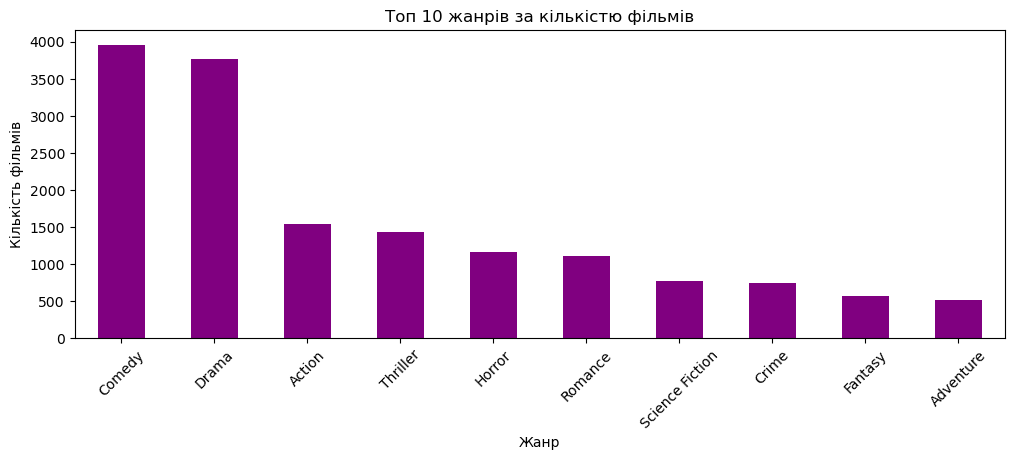

In [608]:
# Тепер можна будувати діаграми
plt.figure(figsize=(12,4))
genre_counts.plot(kind="bar", color="purple")
plt.title("Топ 10 жанрів за кількістю фільмів")
plt.xlabel("Жанр")
plt.ylabel("Кількість фільмів")
plt.xticks(rotation=45)
plt.show()

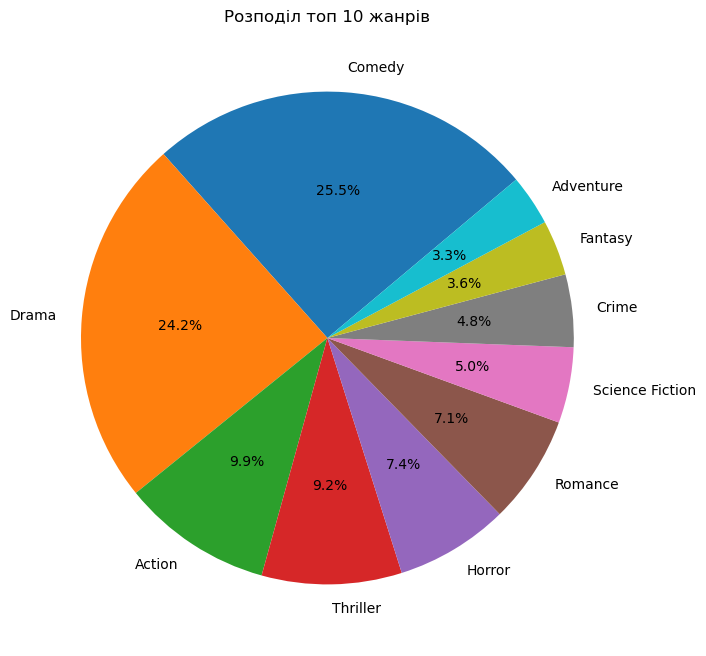

In [609]:
plt.figure(figsize=(10,8))
genre_counts.plot(kind="pie", autopct="%1.1f%%", startangle=40)
plt.title("Розподіл топ 10 жанрів")
plt.ylabel("") # прибираємо підпис осі
plt.show()

6. Тепер вибери 3 найпопулярніших жанри і подивись, як змінювалась їх популярність впродовж обраного тобою часового періода.     
Для цього підрахуй кількість фільмів в кожному жанрі за кожен рік спостереження.    
Виведи результат у вигляді лінійного графіка.

In [610]:
# Об'єднуємо ТОП-3 жанри в список
top3 = genre_counts.head(3).index.tolist()
print(top3)

['Comedy', 'Drama', 'Action']


In [611]:
# Групуємо за роком та жанром
years = (genres_exploded[genres_exploded["genres"].isin(top3)]
         .groupby(["year", "genres"]).size() 
         .reset_index(name="count") # Додаємо колонку з підрахунком жанра
        )

In [612]:
print(years)

     year  genres  count
0    1980  Action     24
1    1980  Comedy     78
2    1980   Drama     51
3    1981  Action     18
4    1981  Comedy     55
..    ...     ...    ...
127  2022  Comedy    104
128  2022   Drama     90
129  2023  Action     33
130  2023  Comedy     60
131  2023   Drama     43

[132 rows x 3 columns]


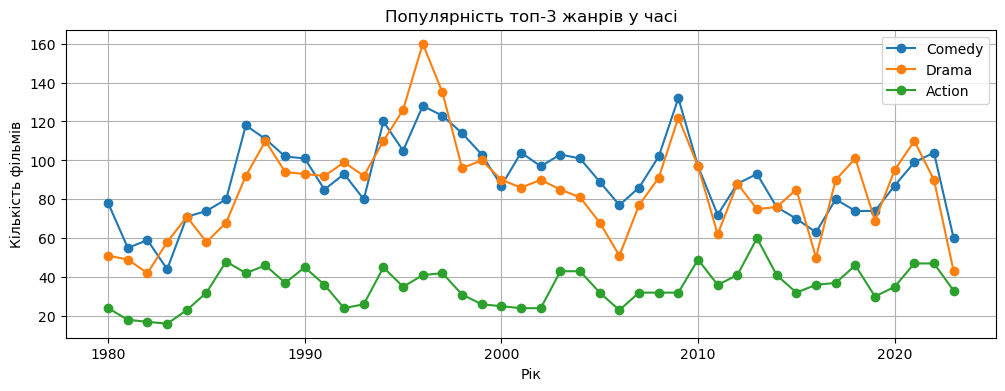

In [613]:
# Будуємо лінійний графік
plt.figure(figsize=(12,4))
for genre in top3:
    data = years[years["genres"] == genre]
    plt.plot(data["year"], data["count"], marker="o", label=genre)

plt.title("Популярність топ-3 жанрів у часі")
plt.xlabel("Рік")
plt.ylabel("Кількість фільмів")
plt.legend()
plt.grid(True)
plt.show()

7. Тепер слід попрацювати з акторами.     
Віднайди топ 10 акторів за кількістю фільмів.    
Побудуй стовпчикову або кругову діаграму, а також виведи на екран підсумукову таблицю.

In [614]:
# Відділемо кожного актора зі списку
actors_exploded = movies_united.explode("cast")

In [615]:
# Порахуємо кількість фільмів і віднайдемо ТОП 10 акторів
movie_counts = actors_exploded["cast"].value_counts().head(10)

In [616]:
# Виведемо підсумкову таблицю
print("Топ 10 акторів за кількістю фільмів:")
print(movie_counts)

Топ 10 акторів за кількістю фільмів:
cast
Bruce Willis         104
Samuel L. Jackson     92
Robert De Niro        77
Morgan Freeman        72
Nicolas Cage          71
Liam Neeson           69
Dennis Quaid          69
John Goodman          66
Willem Dafoe          65
Julianne Moore        65
Name: count, dtype: int64


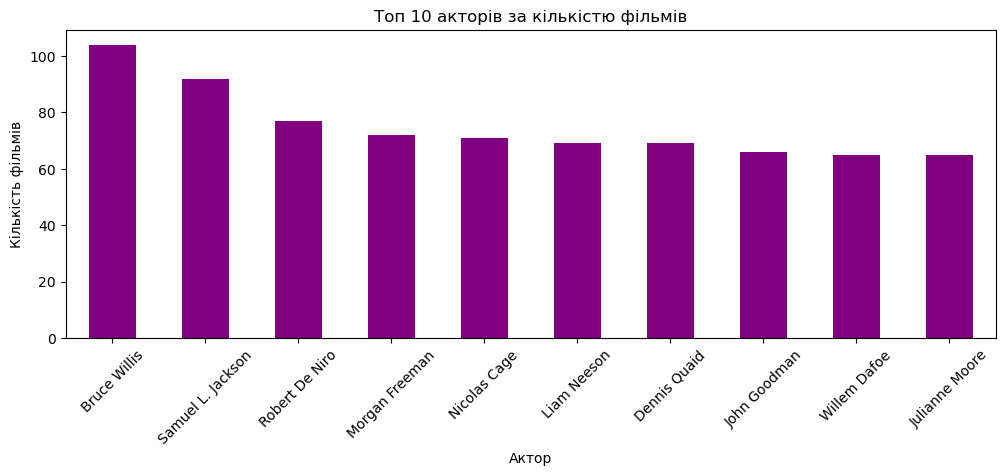

In [617]:
# Тепер можна будувати діаграму
plt.figure(figsize=(12,4))
movie_counts.plot(kind="bar", color="purple")
plt.title("Топ 10 акторів за кількістю фільмів")
plt.xlabel("Актор")
plt.ylabel("Кількість фільмів")
plt.xticks(rotation=45)
plt.show()

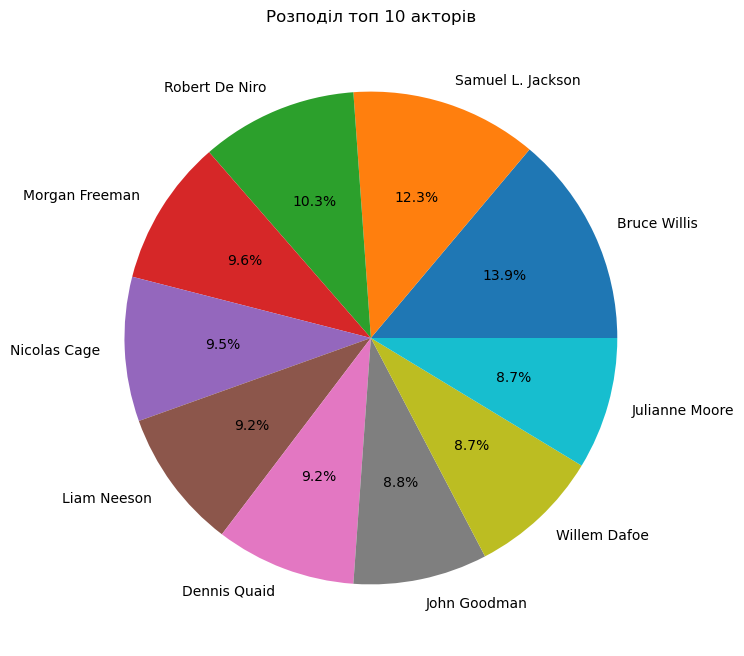

In [618]:
# Побудуємо кругову діаграму
plt.figure(figsize=(10,8))
movie_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Розподіл топ 10 акторів")
plt.ylabel("") # прибираємо підпис осі
plt.show()

8. Тепер вибери 3 найпопулярніших актори і подивись, як змінювалась їх популярність впродовж обраного тобою часового періода.
Для цього підрахуй кількість фільмів для кожного актора за кожен рік спостереження.    
Виведи результат у вигляді лінійного графіка.

In [619]:
# Об'єднаємо ТОП-3 акторів в список
top3_actors = movie_counts.head(3).index.tolist()
print(top3_actors)

['Bruce Willis', 'Samuel L. Jackson', 'Robert De Niro']


In [620]:
# Групуємо за роком та іменем
act_years = (actors_exploded[actors_exploded["cast"].isin(top3_actors)]
         .groupby(["year", "cast"]).size() 
         .reset_index(name="count") # Додаємо колонку з підрахунком жанра
        )

In [621]:
print(act_years)

     year               cast  count
0    1980     Robert De Niro      1
1    1981     Robert De Niro      1
2    1983     Robert De Niro      1
3    1984     Robert De Niro      2
4    1985     Robert De Niro      1
..    ...                ...    ...
105  2022     Robert De Niro      1
106  2022  Samuel L. Jackson      2
107  2023       Bruce Willis      2
108  2023     Robert De Niro      2
109  2023  Samuel L. Jackson      1

[110 rows x 3 columns]


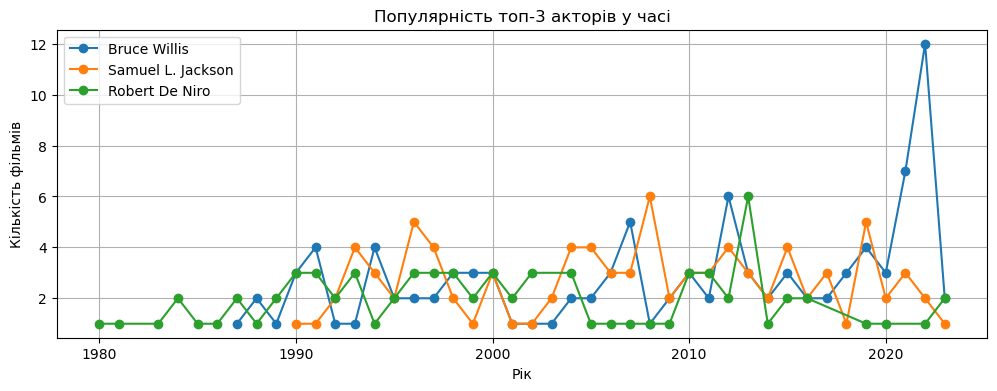

In [622]:
# Будуємо лінійний графік
plt.figure(figsize=(12,4))
for cast in top3_actors:
    data = act_years[act_years["cast"] == cast]
    plt.plot(data["year"], data["count"], marker="o", label=cast)

plt.title("Популярність топ-3 акторів у часі")
plt.xlabel("Рік")
plt.ylabel("Кількість фільмів")
plt.legend()
plt.grid(True)
plt.show()

***Бонусне завдання***       
Зосередься лише на 10 найпопулярніших акторах.     
 Порахуй, як часто кожен актор з'являється в фільмі, що належить до категорії топ-3 найпопулярніших жанри, та як часто в фільмі, що не включає топовий жанр.  
 Оціни пропорції для кожного актора у вигляді стовпчикової діаграми та у вигляді таблиці, де вказано також відсоток фільмів в топ жанрах.

In [623]:
# Розгортаємо списки акторів та жанрів
actors_genres_exploded = movies_united.explode("genres").explode("cast")

In [624]:
# Створюємо додаткову колонку top_genres
actors_genres_exploded["top_genres"] = actors_genres_exploded["genres"].isin(top3)

In [625]:
# Фільтруємо ТОП 10 акторів по жанрам
filtered_top10 = actors_genres_exploded[actors_genres_exploded["cast"].isin(movie_counts.index.tolist())]

In [626]:
# Групуємо акторів з жанрами
counting = (filtered_top10.groupby(["cast", "top_genres"])
            .size() # рахуємо кількість появ  актора в фільмах
            .reset_index(name="count") # додаємо стовпчик "count"
            .pivot(index="cast", columns="top_genres", values="count") # повертаємо стовпчик "top_genres" де задаємо значення зі стовпчика "count" 
            .fillna(0) # ставимо 0, якщо по певній категорії у актора нема виходів
           )

In [627]:
# Задаємо імена новим колонкам
# counting.columns = ["Other", "TOP 3"]
print("ТОП 10 акторів у фільмах з ТОП 3 жанрами:")
print(counting)

ТОП 10 акторів у фільмах з ТОП 3 жанрами:
top_genres         False  True 
cast                           
Bruce Willis         109    107
Dennis Quaid          97     65
John Goodman          76     69
Julianne Moore        61     61
Liam Neeson           86     63
Morgan Freeman        79     59
Nicolas Cage          89     62
Robert De Niro        87     76
Samuel L. Jackson    106     67
Willem Dafoe          87     47


In [628]:
# Задаємо зрозумілі назви колонкам
counting.columns = ["Інші фільми", "Топ-3 жанри"]

# Відсоток появ акторів в ТОП жанрах
counting["Всього"] = counting.sum(axis=1)
counting["% топ-3"] = (
    counting["Топ-3 жанри"] / counting["Всього"] * 100
).round(2)

In [629]:
# Виводимо результат в таблицю
print("Кількість появ топ-10 акторів у фільмах з топ-3 жанрами:")
print(counting)

Кількість появ топ-10 акторів у фільмах з топ-3 жанрами:
                   Інші фільми  Топ-3 жанри  Всього  % топ-3
cast                                                        
Bruce Willis               109          107     216    49.54
Dennis Quaid                97           65     162    40.12
John Goodman                76           69     145    47.59
Julianne Moore              61           61     122    50.00
Liam Neeson                 86           63     149    42.28
Morgan Freeman              79           59     138    42.75
Nicolas Cage                89           62     151    41.06
Robert De Niro              87           76     163    46.63
Samuel L. Jackson          106           67     173    38.73
Willem Dafoe                87           47     134    35.07


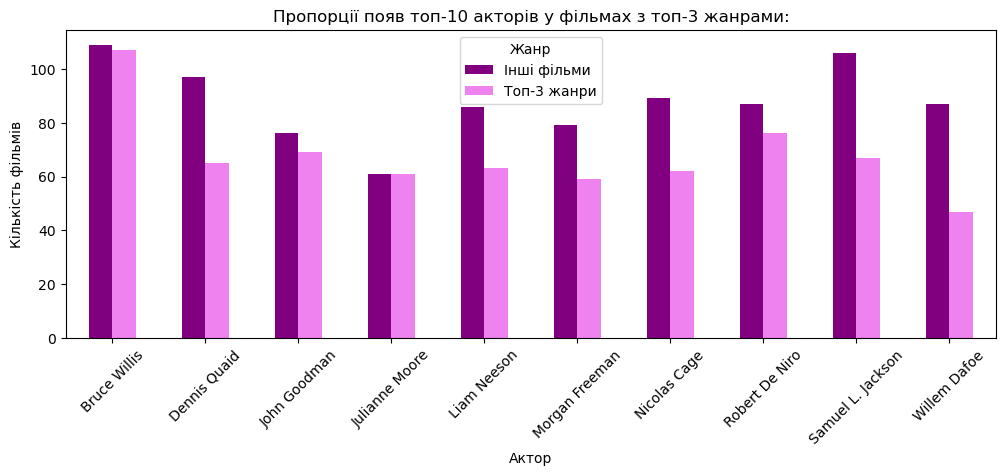

In [630]:
# Будуємо діаграму
counting[["Інші фільми", "Топ-3 жанри"]].plot(kind="bar", figsize=(12,4), stacked=False, color=["purple", "violet"])
plt.title("Пропорції появ топ-10 акторів у фільмах з топ-3 жанрами:")
plt.xlabel("Актор")
plt.ylabel("Кількість фільмів")
plt.xticks(rotation=45)
plt.legend(title="Жанр")
plt.show()